# Feature import

In [ ]:
import pandas as pd

df = pd.read_csv('/content/bank-full.csv')
print(df.head())

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


In [ ]:
for column in df.columns:

    if isinstance(df[column][0], str):
      unique_categories = df[column].unique()
      category_mapping = {category: index for index, category in enumerate(unique_categories)}
      df[column] = df[column].map(category_mapping)


In [ ]:
Xy = df.values
print(df.head())

   age  job  marital  education  default  balance  housing  loan  contact  \
0   58    0        0          0        0     2143        0     0        0   
1   44    1        1          1        0       29        0     0        0   
2   33    2        0          1        0        2        0     1        0   
3   47    3        0          2        0     1506        0     0        0   
4   33    4        1          2        0        1        1     0        0   

   day  month  duration  campaign  pdays  previous  poutcome  y  
0    5      0       261         1     -1         0         0  0  
1    5      0       151         1     -1         0         0  0  
2    5      0        76         1     -1         0         0  0  
3    5      0        92         1     -1         0         0  0  
4    5      0       198         1     -1         0         0  0  


In [ ]:
X = Xy[:, :-1]
y = Xy[:, -1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic regression classifier

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler  # feature  preprocessing
from sklearn.model_selection import train_test_split
import numpy as np

In [ ]:
classifier = LogisticRegression(penalty='l2')
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.8854362490324007


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact']
onehot_encoder = OneHotEncoder(sparse=False)
X_categorical_encoded = onehot_encoder.fit_transform(df[categorical_features])

numerical_features = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
scaler = StandardScaler()
X_numerical_scaled = scaler.fit_transform(df[numerical_features])

X = np.concatenate((X_categorical_encoded, X_numerical_scaled), axis=1)
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
classifier = LogisticRegression(penalty='l2')
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.8870949906004645


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
classifier = LogisticRegression(penalty='l2')
classifier.fit(X_train_unique_sub, y_train_unique_sub)

y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.8037155811124627


# Random Forest, to tackle classes imbalance

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8941722879575362


In [ ]:
y_train_reshaped = (y_train.values).reshape(-1, 1)

Xy_train = np.concatenate((X_train, y_train_reshaped), axis=1)
Xy_unique = np.unique(Xy_train, axis=0)

X_train_unique = Xy_unique[:, :-1]
y_train_unique = Xy_unique[:, -1]

In [ ]:
Xy_unique.shape

(36167, 35)

In [ ]:
counts = np.bincount(Xy_unique[:, -1].astype(np.int64))
print(counts)

[31969  4198]


# Balancing classes: random subsampler fails

In [ ]:
import numpy as np

labels = Xy_unique[:, -1].astype(np.int64)
unique_labels = np.unique(labels)

min_count = np.min(np.bincount(labels))
subsampled_indices = []

for label in unique_labels:
    indices = np.where(labels == label)[0]
    selected_indices = np.random.choice(indices, min_count, replace=False)
    subsampled_indices.extend(selected_indices)

Xy_unique_subs = Xy_unique[subsampled_indices]

X_train_unique_sub = Xy_unique_subs[:, :-1]
y_train_unique_sub = Xy_unique_subs[:, -1]

In [ ]:
classifier = RandomForestClassifier()
classifier.fit(X_train_unique, y_train_unique)

y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8946146190423532


# Feature importance

In [ ]:
feature_importances = classifier.feature_importances_

print(feature_importances)

[0.0103504  0.01115745 0.00455139 0.00945035 0.00176606 0.00549551
 0.01005207 0.00724328 0.00556307 0.00551504 0.00407617 0.00444178
 0.01052835 0.00916257 0.00762503 0.01097123 0.01213173 0.00570049
 0.00784998 0.00152884 0.00139728 0.01591039 0.01542166 0.007236
 0.0071586  0.00997577 0.00999927 0.00501203 0.141949   0.15730434
 0.32765271 0.0525655  0.06387545 0.03938119]


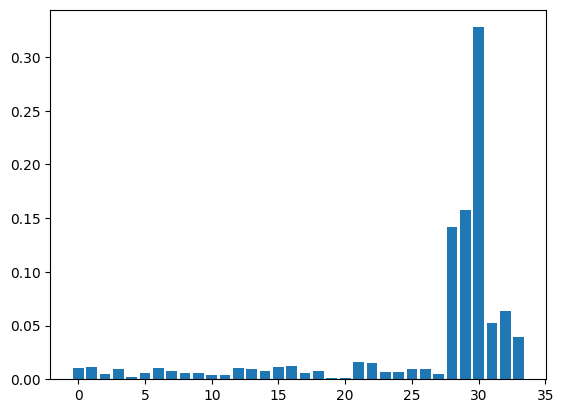

In [ ]:
import matplotlib.pyplot as plt

plt.bar(range(len(feature_importances)), feature_importances)
plt.show()

In [ ]:
X_categorical_encoded.shape

(45211, 28)

# Here's a brief explanation of what the StandardScaler does:

Centering: The StandardScaler centers the data by subtracting the mean of each feature from the corresponding feature values. This ensures that the mean of each feature becomes zero.

Scaling: After centering, the StandardScaler scales the centered data by dividing each feature by its standard deviation. This step ensures that each feature has a unit variance.



In [ ]:
X_numerical_scaled.shape # ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

(45211, 6)

In [ ]:
np.max(X_numerical_scaled)

119.13598229870267